## <center><font color='#C808B1'>Vitamin A  & D </font></center>

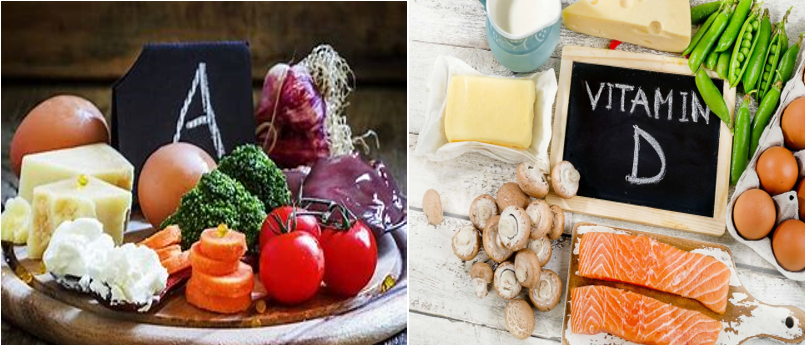

### <font color='black'>importing libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

### importing data 

In [2]:
df= pd.read_csv('vitamins_data.csv')
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,India,163819614,17.6,13.8
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9


deleting the first row

In [3]:
df.drop(0,axis=0,inplace = True)

summary statistics of dataframe

In [4]:
df.describe()

,Population(0-6)years,VitA_deficit%,VitD_deficit%
count,3.000000e+01,28.000000,30.000000
mean,5.516359e+06,17.425000,15.860000
std,6.736190e+06,9.912343,13.488248
min,7.819500e+04,2.400000,1.100000
25%,5.492685e+05,9.550000,5.800000
50%,3.445226e+06,17.100000,12.300000
75%,7.458093e+06,21.925000,22.850000
max,3.162463e+07,43.200000,52.100000


In [5]:
df.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           2
VitD_deficit%           0
dtype: int64

univariate distribution of observations

Text(0.5, 1.0, 'Distribution of the column VitD_deficit%')

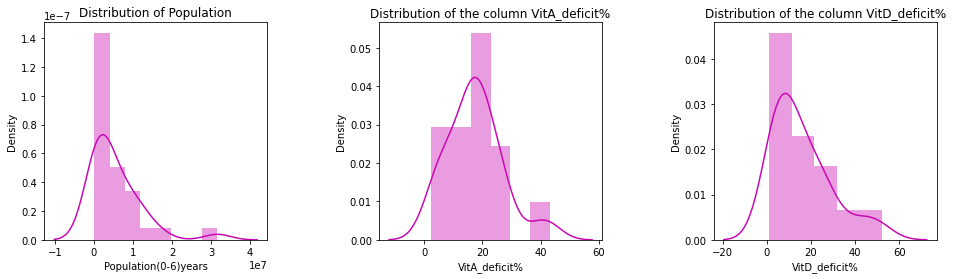

In [34]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
fig.subplots_adjust(wspace = 0.5)
sns.distplot(df['Population(0-6)years'],color='#C808B1', ax=ax[0]).set_title('Distribution of Population')
sns.distplot(df['VitA_deficit%'],color='#C808B1', ax=ax[1]).set_title('Distribution of the column VitA_deficit%')
sns.distplot(df['VitD_deficit%'],color='#C808B1', ax=ax[2]).set_title('Distribution of the column VitD_deficit%')

### filling missing values

In [7]:
df['VitA_deficit%'].fillna(df['VitA_deficit%'].mean(), inplace = True)

In [8]:
df['VitA_deficit_total'] = df['VitA_deficit%'] * df['Population(0-6)years'] /100

In [9]:
df['VitD_deficit_total'] = df['VitD_deficit%'] * df['Population(0-6)years'] /100

### plotting bar graph for better understanding

<AxesSubplot:title={'center':'Percentage of deficiency of Vitamin A and Vitamin D'}, xlabel='State'>

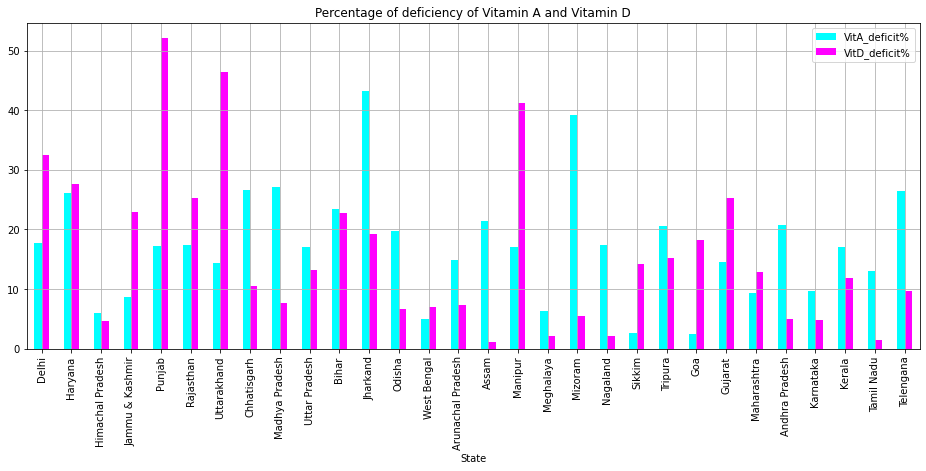

In [28]:
fig, ax= plt.subplots(figsize=(16,6))
df.plot(x= 'State', y =['VitA_deficit%', 'VitD_deficit%'], kind = 'bar',
        title ='Percentage of deficiency of Vitamin A and Vitamin D', grid=True,ax=ax, colormap='cool')

In [ ]:
Vitamin D deficiency is majorly in punjab compare to all states. if we launch our product it is more beneficial other than we launch at Assam and Tamilnadu. Overall south india people are less effected to vitamin deficiency compare to north india. if we take vitamin A deficiency then jharkhand has most affected people and less in Himachal pradesh 

So the Targeted Locations Are:
    1) Punjab(Vitamin -D)
    2) Jharkhand (Vitamin -A)

<AxesSubplot:title={'center':'Total population deficiency of Vitamin A and Vitamin D'}, xlabel='State'>

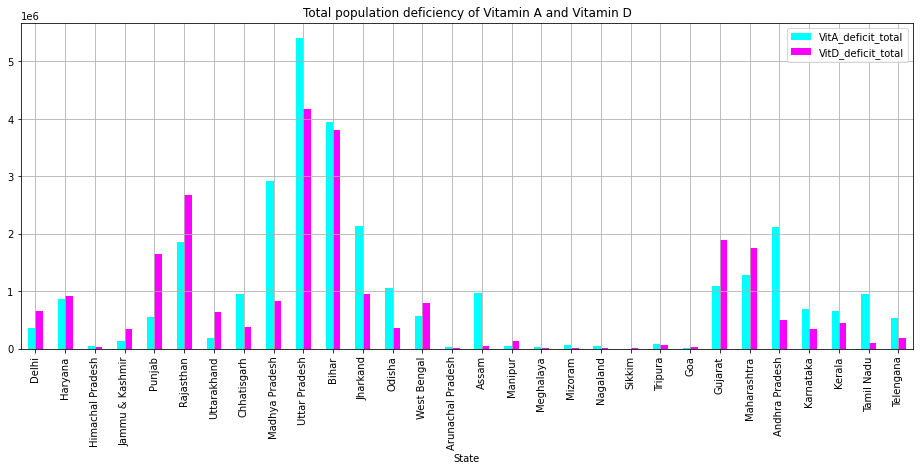

In [24]:
fig, ax= plt.subplots(figsize=(16,6))
df.plot(x= 'State', y =['VitA_deficit_total', 'VitD_deficit_total'], kind = 'bar',
        title ='Total population deficiency of Vitamin A and Vitamin D', grid=True,ax=ax, colormap='cool')

In [12]:
train = df[['VitA_deficit%','VitD_deficit%','VitA_deficit_total','VitD_deficit_total']]

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 <br>the standard deviation is 1

In [13]:
sc= StandardScaler().fit(train)
train_std = sc.transform(train)

### finding groups which have not been explicitly labeled in the data using K means

In [14]:
from sklearn.cluster import KMeans

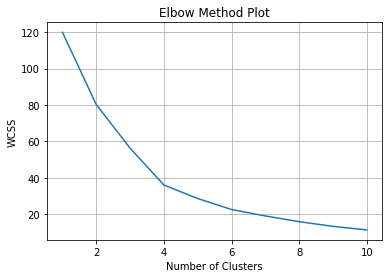

In [15]:
wcss =[]

for i in range(1,11):
    kmns= KMeans(n_clusters = i, init = 'k-means++', random_state =23)
    kmns.fit(train_std)
    wcss.append(kmns.inertia_)
    
  
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()

The silhouette score for no. of cluster k =  3  is :-  0.3390144574166799
The silhouette score for no. of cluster k =  4  is :-  0.3396809882591863
The silhouette score for no. of cluster k =  5  is :-  0.36173462627882186
The silhouette score for no. of cluster k =  6  is :-  0.3463507399737702


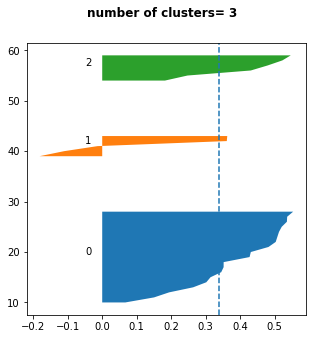

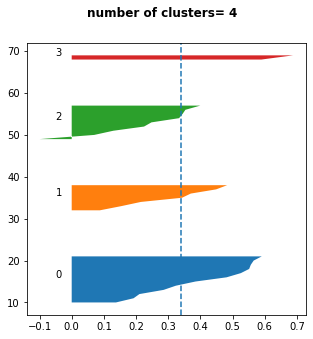

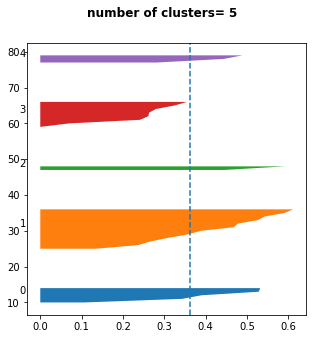

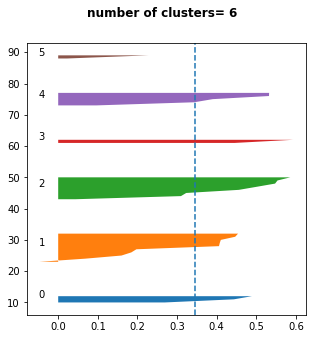

In [16]:
predict = []
for i in range(3,7):
    k = KMeans(n_clusters=i, random_state=23)
    pred= k.fit_predict(train_std)
    predict.append(pred)
    score =silhouette_score(train_std,pred)
    print('The silhouette score for no. of cluster k = ',i ,' is :- ', score)
    
    sil_sam = silhouette_samples(train_std,pred)
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    y_lower =10
    for j in range(i):
        jth_clus_sil_val = sil_sam[pred==j]
        jth_clus_sil_val.sort()
        j_size_clus = jth_clus_sil_val.shape[0]
        y_upper = y_lower + j_size_clus
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,jth_clus_sil_val)
        ax.text(-0.05,y_lower+0.5*j_size_clus, str(j))
        y_lower = y_upper + 10
    ax.axvline(x= score,linestyle= '--')
    plt.suptitle('number of clusters= %d' %i, fontweight= 'bold')

In [17]:
predict[2]

array([0, 0, 1, 1, 0, 4, 0, 3, 3, 2, 2, 3, 3, 1, 1, 3, 0, 1, 3, 1, 1, 1,
       1, 4, 4, 3, 1, 1, 1, 3])

In [18]:
df['Cluster'] = predict[2]

In [19]:
df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,VitA_deficit_total,VitD_deficit_total,Cluster
1,Delhi,2016849,17.8,32.5,358999.122,655475.925,0
2,Haryana,3335537,26.1,27.6,870575.157,920608.212,0
3,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302,1
4,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887,1
5,Punjab,3171829,17.2,52.1,545554.588,1652522.909,0


In [20]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]
df5 = df[df['Cluster']==4]

checking which cluster coveres which state

In [35]:
cluster1 = df1.State
cluster2 = df2.State
cluster3 = df3.State
cluster4 = df4.State
cluster5 = df5.State

In [38]:
from colorama import Fore

In [46]:
my_str = f"{Fore.MAGENTA}States in Cluster1 are: {Style.RESET_ALL}"
print(my_str)
print(cluster1.to_numpy())
print(" ")

my_str = f"{Fore.MAGENTA}States in Cluster2 are: {Style.RESET_ALL}"
print(my_str)
print(cluster2.to_numpy())
print(" ")

my_str = f"{Fore.MAGENTA}States in Cluster3 are: {Style.RESET_ALL}"
print(my_str)
print(cluster3.to_numpy())
print(" ")

my_str = f"{Fore.MAGENTA}States in Cluster4 are: {Style.RESET_ALL}"
print(my_str)
print(cluster4.to_numpy())
print(" ")

my_str = f"{Fore.MAGENTA}States in Cluster5 are: {Style.RESET_ALL}"
print(my_str)
print(cluster5.to_numpy())

States in Cluster1 are: 
['Delhi' 'Haryana' 'Punjab' 'Uttarakhand' 'Manipur']
 
States in Cluster2 are: 
['Himachal Pradesh' 'Jammu & Kashmir' 'West Bengal' 'Arunachal Pradesh'
 'Meghalaya' 'Nagaland' 'Sikkim' 'Tripura' 'Goa' 'Karnataka' 'Kerala'
 'Tamil Nadu']
 
States in Cluster3 are: 
['Uttar Pradesh' 'Bihar']
 
States in Cluster4 are: 
['Chhatisgarh' 'Madhya Pradesh' 'Jharkand' 'Odisha' 'Assam' 'Mizoram'
 'Andhra Pradesh' 'Telengana']
 
States in Cluster5 are: 
['Rajasthan' 'Gujarat' 'Maharashtra']


## <center><font color='#C808B1'>Thank  you!</font></center>